# Data spaces thesis  
### Tabacaru Raluca Gariebla s267581

In [ ]:
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

# Table of contents
1. [The Dry Bean Dataset](#introduction)
2. [Data Analysis ](#dataset)  
    2.1 [The dataset's content](#content)  
    2.2 [Description of features](#features)  
    2.3 [Descriptive statistics ](#statistics)  
    2.4 [Missing values](#missing)  
    2.5 [Features distribution](#distribution)  
    2.6 [Target analysis](#target)  
3. [Pre-Processing](#Pre-Processing)  
    3.1 [Prediction features division](#division)  
    3.2 [Train-test split](#split)  
    3.3 [Normalization](#normalization)

<!--  
    1. [Sub paragraph](#subparagraph1)
3. [Another paragraph](#paragraph2) -->





## 1. Introduction<a name="introduction">  

A team of Faculty of Technology, Selcuk University, TURKEY, created the Dry Been Dataset from 13,611 images of grains. They extract a total of 16 features such as form, shape, type, and structure by the market situation. The dataset is available at: <https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset>


This thesis aims to classify different types of dry beans based on this dataset, of which a few observations are shown below.


In [8]:
df = pd.read_excel("./DryBeanDataset/Dry_Bean_Dataset.xlsx")
df.head()  

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## 2. Data Analysis  <a name="dataset">  

### 2.1  The dataset's content  <a name="content">

The dataset size is:

In [9]:
print(df.shape)
print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1])

(13611, 17)
Number of samples: 13611
Number of features: 17


The dataset features are:

In [10]:
featureNames = list(df)
print(featureNames)

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


### 2.2 Description of features <a name="features">
    
1. Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)  

The Class attribute is the target 

### 2.3 Descriptive statistics <a name="statistics">

A few statistics can be derived from the dataset using the "describe" method which provides this information:  

- count: the number of elements present in each feature;
- mean: the average of a feature;
- std: the standard deviation of observation;
- min: the minimum value of the feature;
- 25%: the 25 percentile;
- 50%: the 50 percentile;
- 75%: the 75 percentile;
- max: the maximum value of the feature.

Below is a summary table with the data:


In [11]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### 2.4 Missing values <a name="missing">

In order to implement algorithms correctly, it is important to identify whether any values are missing in the dataset. In the event that they were present, this would require a correction to prevent the problem. The simplest solution is, for example, to remove them from the dataset.

In [12]:
missing = df.isnull().sum()

if missing.sum() == 0:
    print("In this dataset there are no missing values.")
else:
    print(f"In this dataset there are some missing values:{missing}")

In this dataset there are no missing values.


### 2.5 Features distributions <a name="distribution">  

Below is a visual representation of the distribution of features within the dataset:


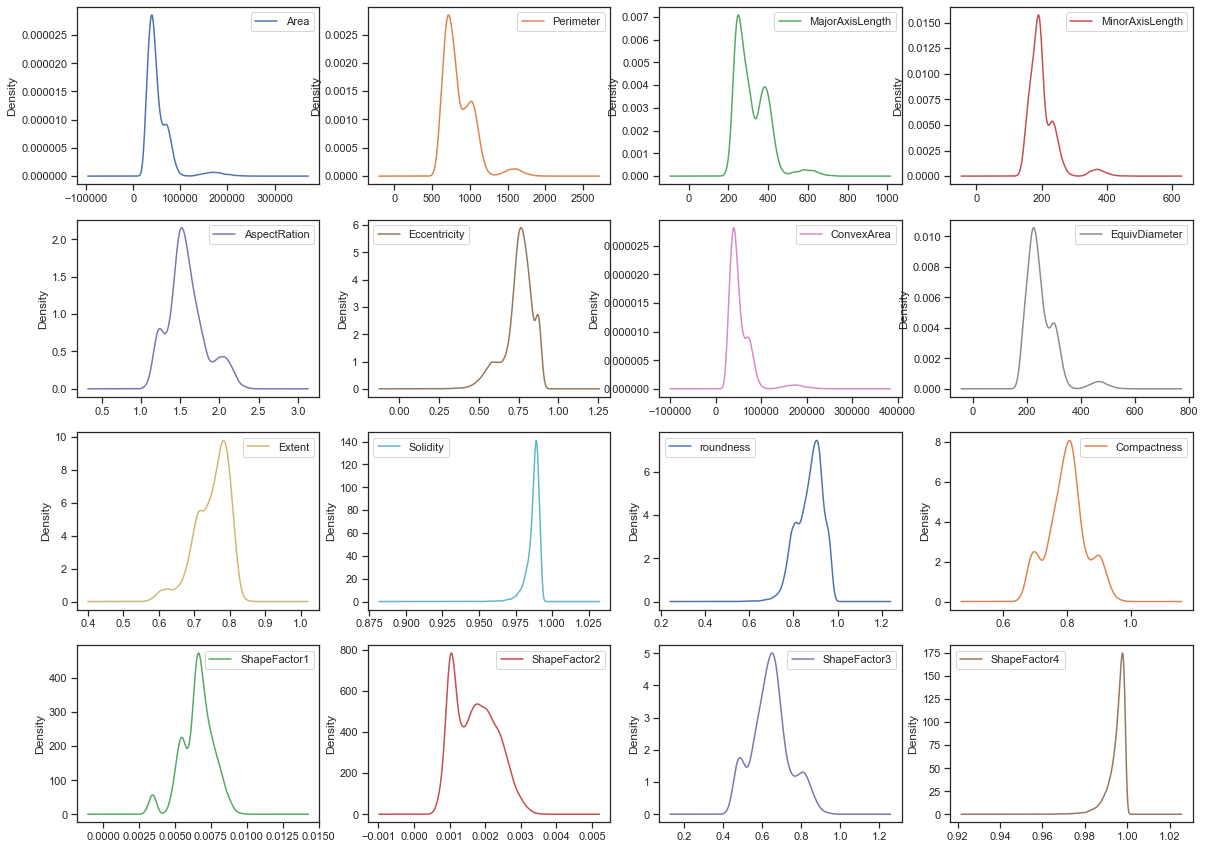

In [13]:
features = df.drop(columns="Class")
features.plot(kind='density', subplots=True, layout=(4,4), figsize=(20,15), sharex=False, sharey=False)
plt.show()

The box plot is a great way to show data distributions in a compact and effective way. Statistical summaries can be visualized and possible outliers can be highlighted. Outliers are anomalous observations that are numerically distant from the rest of the data. In a box plot, an outlier represents a data point that occurs outside its whiskers.

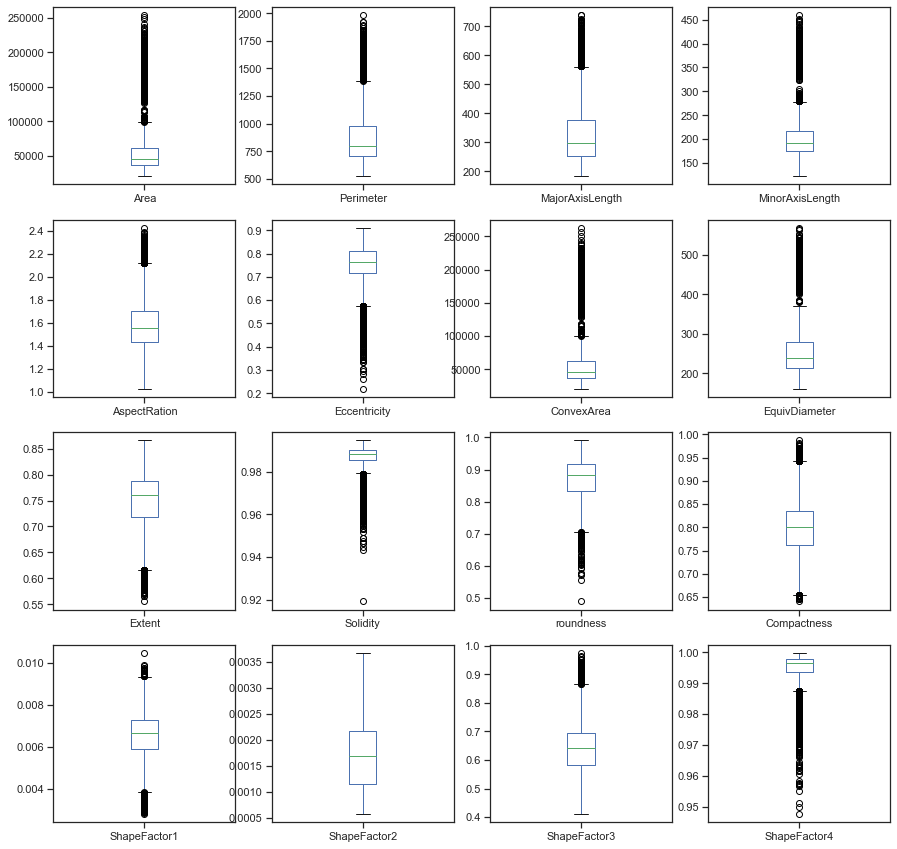

In [14]:
features.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15), sharex=False, sharey=False)
plt.show()

A correlation matrix is a table that shows the correlation coefficients among sets of variables. In the correlation matrix, the values lie between -1 and +1. Values close to -1 are interpreted as negative correlations, values close to +1 are interpreted as positive correlations. If the value is close to 0, it indicates that there is no connection between these two variables.   
Formule???

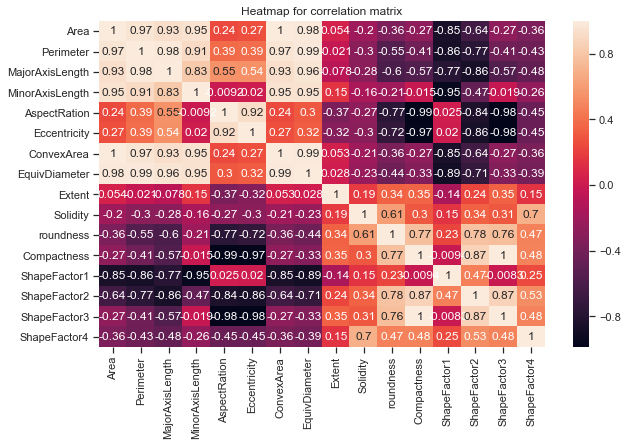

In [15]:
corrMatrix = df.corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(corrMatrix, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title("Heatmap for correlation matrix")
plt.show()

### 2.6 Target analysis<a name="target">

In [29]:
print('The target classes are:')
df.Class.unique()

The target classes are:


array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [40]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

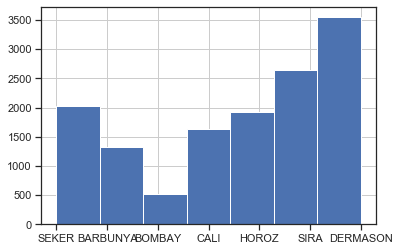

In [46]:
df.Class.hist(bins=7)

## 3. Pre-Processing <a name="Pre-Processing">

### 3.1 Prediction features division <a name="division">
First, it is necessary to divide the target column from the rest. Both the model learning process and the test use the target value. In our dataset, the target value is expressed by the Class feature.

In [47]:
X = df.drop(columns=['Class']).values
Y = df['Class'].values

### 3.2 Train-test split <a name="split">
Machine learning algorithms typically perform a train-test split to gauge their performance.  
A dataset is divided into two subsets. The first subset is used to fit the model and is called the training dataset. The second subset is used to evaluate the fit machine learning model and it is referred to as the test dataset.   
As a first attempt, the dataset was divided into 2/3 training dataset and 1/3 test dataset.  

The division is performed using the train_test_split library function that, given a proportion of test set size to training set size, returns the divided dataset. To have samples randomly selected from the dataset, random_state = 1 was set. This way, the training and test datasets contain a wide variety of classes.


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=1)


print("The size of the training set is:", len(X_train))
print("The size of the test set is:", len(X_test))

The size of the training set is: 9119
The size of the test set is: 4492


### 3.3 Normalization <a name="normalization"> 

cose

In [63]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


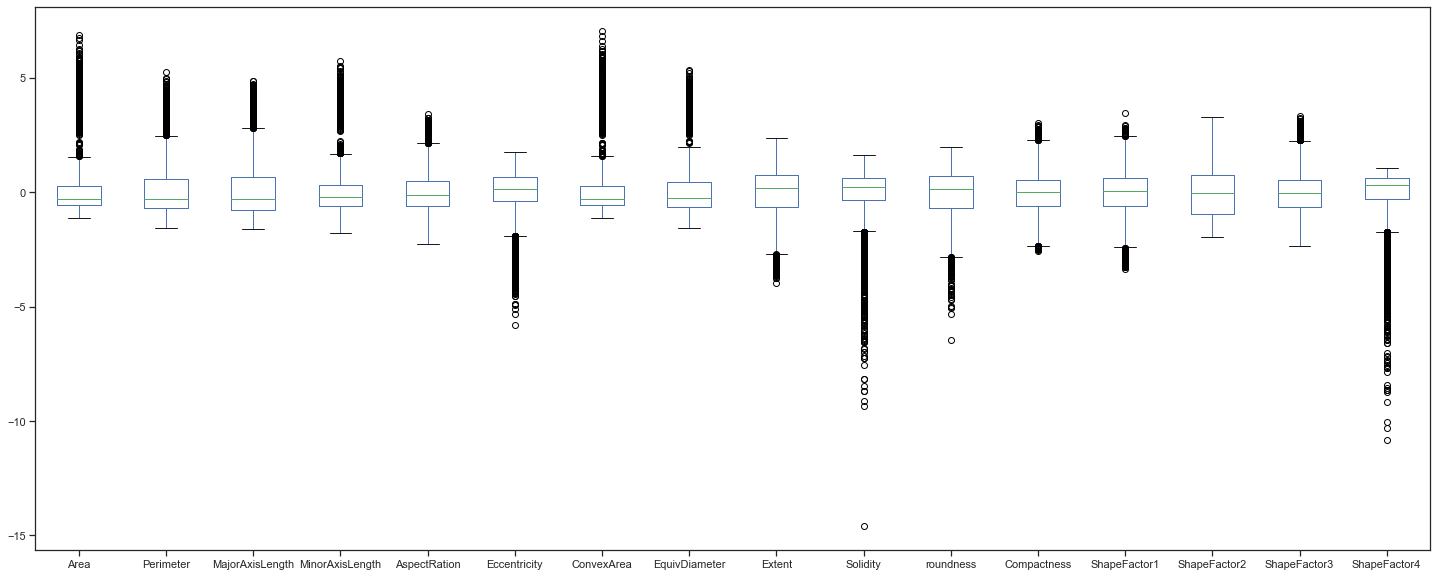

In [70]:
features = df.drop(columns="Class")
features[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']] = scaler.fit_transform(features[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']])
features.plot(kind='box', figsize=(25,10))
plt.show()

3.4 Features reduction 
When we have many features we can run into a performance and memory space problem. It must be considered that not all features are relevant to the problem to be solved, to select which features to use two techniques can be used:

Dimensionality reduction: it is based on mathematical techniques that allow the recombination of the original features (e.g: PCA, Fisher LDA).
Feature selection: it is based on taking a subset of features. From a mathematical point of view it means designing the points in a new space called feature space.
3.5 PCA 
Principal Component Analysis is a decomposition technique that extracts from a multivariate dataset a set of successive orthogonal components that explain a maximum amount of variance.

In other words, it is an approximation of the dataset in a lower dimensional space, preserving largest variances in the data.

In [122]:
def plotPCACumulativeExplainedVariance(pca):
    plt.figure(figsize=(12,8))
    plt.bar(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='orange')
    plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
    plt.title('Explained variance by different principal components')
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance in percent')
    plt.show()

In [137]:
def plotPCABiplot(score, y, coeff, labels=None):
    plt.figure(figsize=(12,8))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    colors = np.random.rand(len(y))
    plt.scatter(xs * scalex,ys * scaley, c=colors )
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.title('PCA biplot')
    plt.show()

In [138]:
def makePCA(X_train_, Y_train_, X_test_, labels=None):
    pca = PCA(n_components=.95)
    pca.fit(X_train_)
    X_train_pca_ = pca.transform(X_train_)
    X_test_pca_ = pca.transform(X_test_)
    
    pca_full = PCA()
    pca_full.fit(X_train_)
    X_train_pca_full_ = pca_full.transform(X_train_)
    
    plotPCACumulativeExplainedVariance(pca_full)
    plotPCABiplot(X_train_pca_full_[:,0:2], Y_train_, np.transpose(pca_full.components_[0:2,:]), labels)
    
    return X_train_pca_, X_test_pca_

At this point, two training dataset version are present: one is similar to the original dataset, and is dedicated to Regression Tree and Random Forest; the other is encoded and normalized, and is dedicated to all other algorithms.

Each time PCA is applyed to one of these two dataset versions, two graphs are plotted.

One graph describes the components obtained from PCA in terms of variance. It contains a bar plot for individual explained variance and a line plot for cumulative explained variance. The individual explained variance is the variance explained by a single component in percentage, and the cumulative explained variance is the cumulative sum of these percentages.

The other graph contains a PCA biplot, which is a merge of a score plot and a loading plot. PCA score plot is a scatter plot of the scores resulted from PCA. The score is the distance between the origin and the 90° projection of a sample along the principal component direction. In our case, only the two first components are showed, to obtain a two-dimentional graph. Morover, the color of the dots reflects the target value (i.e.: from blue to yellow, with an increasing area). The loading plot, instead, shows how strongly each feature influences a principal component. The projection of a vector on a component represent how much weight the corresponding feature has on that component. Furthermore, the angles between the vectors tell us about their correlation: the closer the vectors are, the higher their positive correlation; perpendicular vectors, indicate no correlation; a large angle (close to 180°), means negative correlation.

PCA result on encoded dataset:

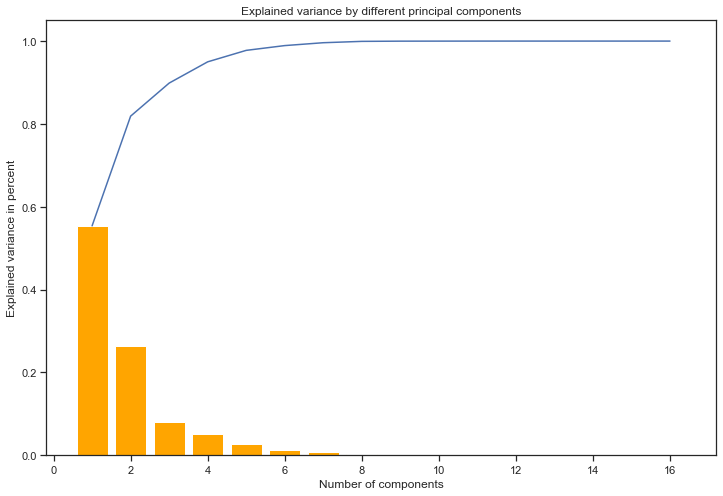

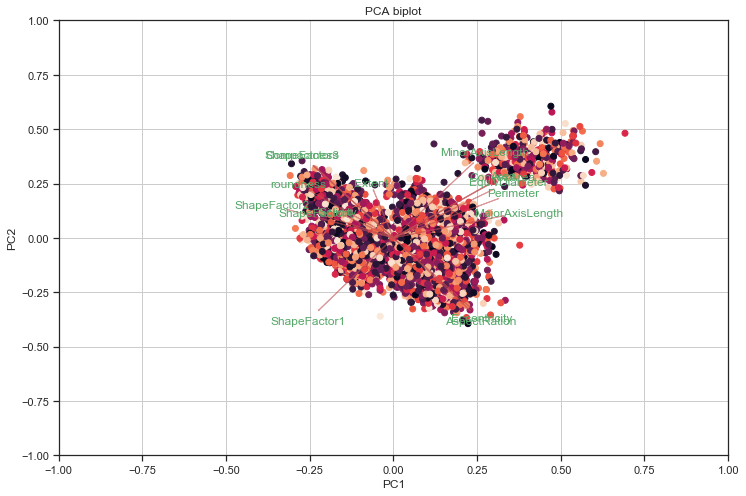

In [139]:
X_train_pca, X_test_pca = makePCA(X_train, Y_train, X_test, featureNames)

## 4 Model Generation 

k-Nearest Neighbors  
Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric
In addition, there is a parameter grid to repeat the 10-fold cross validation process 30 times
Each time, the n_neighbors parameter should be given a different value from the list
We can't give GridSearchCV just a list
We've to specify n_neighbors should take on 1 through 30
You can set n_jobs = -1 to run computations in parallel (if supported by your computer and OS)
This is also called parallel programming


In [153]:
def knn_classifier(X_train_, Y_train_, X_test_, Y_test_):
#When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
    knn = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid={'n_neighbors': [1, 3, 5, 7, 9, 13, 15, 17, 19], 'p': [1, 2]},
                                cv=10, iid=False, n_jobs=-1)
    knn.fit(X_train_, Y_train_)
    print("Best parameters: ", knn.best_params_)
    Y_predict = knn.predict(X_test_)
    result1 = classification_report(Y_test, Y_predict)
    print('Classification Report:')
    print(result1)
    result2 = accuracy_score(Y_test,Y_predict)
    print('Accuracy:',result2)

##### Without PCA:

In [168]:
knn_classifier(X_train, Y_train, X_test, Y_test)

Best parameters:  {'n_neighbors': 9, 'p': 2}
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.90      0.92       430
      BOMBAY       1.00      1.00      1.00       173
        CALI       0.93      0.96      0.94       538
    DERMASON       0.91      0.92      0.92      1151
       HOROZ       0.96      0.96      0.96       627
       SEKER       0.96      0.93      0.95       696
        SIRA       0.86      0.87      0.86       877

    accuracy                           0.92      4492
   macro avg       0.94      0.93      0.94      4492
weighted avg       0.92      0.92      0.92      4492

Accuracy: 0.9238646482635797


##### With PCA:

In [158]:
knn_classifier(X_train_pca, Y_train, X_test_pca, Y_test)

Best parameters:  {'n_neighbors': 9, 'p': 2}
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.90      0.92       430
      BOMBAY       1.00      1.00      1.00       173
        CALI       0.93      0.95      0.94       538
    DERMASON       0.90      0.93      0.92      1151
       HOROZ       0.96      0.96      0.96       627
       SEKER       0.96      0.93      0.94       696
        SIRA       0.86      0.87      0.86       877

    accuracy                           0.92      4492
   macro avg       0.94      0.93      0.94      4492
weighted avg       0.92      0.92      0.92      4492

Accuracy: 0.9227515583259127


In [149]:

result1 = classification_report(Y_test, ypred)
print('Classification Report:')
print(result1)
result2 = accuracy_score(Y_test,ypred)
print('Accuracy:',result2)

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.90      0.92       430
      BOMBAY       1.00      1.00      1.00       173
        CALI       0.93      0.95      0.94       538
    DERMASON       0.90      0.93      0.91      1151
       HOROZ       0.96      0.96      0.96       627
       SEKER       0.96      0.92      0.94       696
        SIRA       0.86      0.86      0.86       877

    accuracy                           0.92      4492
   macro avg       0.94      0.93      0.93      4492
weighted avg       0.92      0.92      0.92      4492

Accuracy: 0.9194122885129118


Decision Trees

In [186]:
def tree_classifier(X_train_, Y_train_, X_test_, Y_test_):
    dt = GridSearchCV(estimator=tree.DecisionTreeClassifier(),
                                param_grid={'criterion':['gini', 'entropy'],
                                           'max_depth': [1, 2, 3, 5, 10, 15, 20]},
                                cv=10, iid=False, n_jobs=-1)
    dt.fit(X_train_, Y_train_)
    print("Best parameters: ", dt.best_params_)
    Y_predict = dt.predict(X_test_)

    result1 = classification_report(Y_test, Y_predict)
    print('Classification Report:')
    print(result1)
    result2 = accuracy_score(Y_test,Y_predict)
    print('Accuracy:',result2)
    

##### Without PCA:

In [187]:
tree_classifier(X_train, Y_train, X_test, Y_test)

Best parameters:  {'criterion': 'gini', 'max_depth': 10}
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.91      0.87      0.89       430
      BOMBAY       1.00      1.00      1.00       173
        CALI       0.92      0.90      0.91       538
    DERMASON       0.88      0.91      0.90      1151
       HOROZ       0.93      0.94      0.93       627
       SEKER       0.96      0.92      0.94       696
        SIRA       0.83      0.83      0.83       877

    accuracy                           0.90      4492
   macro avg       0.92      0.91      0.91      4492
weighted avg       0.90      0.90      0.90      4492

Accuracy: 0.8995992876224399


##### With PCA:

In [188]:
tree_classifier(X_train_pca, Y_train, X_test_pca, Y_test)

Best parameters:  {'criterion': 'gini', 'max_depth': 10}
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.90      0.90      0.90       430
      BOMBAY       0.99      0.98      0.99       173
        CALI       0.90      0.92      0.91       538
    DERMASON       0.89      0.92      0.91      1151
       HOROZ       0.95      0.92      0.94       627
       SEKER       0.96      0.92      0.94       696
        SIRA       0.84      0.84      0.84       877

    accuracy                           0.91      4492
   macro avg       0.92      0.92      0.92      4492
weighted avg       0.91      0.91      0.91      4492

Accuracy: 0.9065004452359751


Random Forset 

In [202]:
def randomForest_classifier(X_train_, Y_train_, X_test_, Y_test_):

    rf = GridSearchCV(estimator=RandomForestClassifier(),
                                param_grid={'max_depth' : [1, 2, 3, 5, 10, 15, 20],
                                            'criterion' :['gini', 'entropy']},
                                cv=10, iid=False, n_jobs=-1)
    rf.fit(X_train_, Y_train_)
    print("Best parameters: ", rf.best_params_)
    Y_predict = rf.predict(X_test_)

    result1 = classification_report(Y_test, Y_predict)
    print('Classification Report:')
    print(result1)
    result2 = accuracy_score(Y_test,Y_predict)
    print('Accuracy:',result2)
    

##### Without PCA:

In [203]:
randomForest_classifier(X_train, Y_train, X_test, Y_test)

Best parameters:  {'criterion': 'entropy', 'max_depth': 20}
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.90      0.91       430
      BOMBAY       1.00      1.00      1.00       173
        CALI       0.94      0.93      0.93       538
    DERMASON       0.89      0.93      0.91      1151
       HOROZ       0.95      0.95      0.95       627
       SEKER       0.96      0.94      0.95       696
        SIRA       0.86      0.84      0.85       877

    accuracy                           0.91      4492
   macro avg       0.93      0.93      0.93      4492
weighted avg       0.92      0.91      0.91      4492

Accuracy: 0.914959928762244


##### With PCA:

In [204]:
randomForest_classifier(X_train_pca, Y_train, X_test_pca, Y_test)

Best parameters:  {'criterion': 'entropy', 'max_depth': 15}
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.93       430
      BOMBAY       1.00      1.00      1.00       173
        CALI       0.93      0.93      0.93       538
    DERMASON       0.89      0.93      0.91      1151
       HOROZ       0.95      0.96      0.95       627
       SEKER       0.97      0.93      0.95       696
        SIRA       0.86      0.84      0.85       877

    accuracy                           0.92      4492
   macro avg       0.93      0.93      0.93      4492
weighted avg       0.92      0.92      0.92      4492

Accuracy: 0.917853962600178


SVM 

In [218]:
def svm_classifier(X_train_, Y_train_, X_test_, Y_test_):

    scv = GridSearchCV(estimator=svm.SVC(decision_function_shape = 'ovr'),
                                param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 
                                            'gamma': [0.001, 0.01, 0.1, 1, 10], 
                                            'kernel': ['rbf', 'sigmoid']},
                                cv=10, iid=False, n_jobs=-1)
    scv.fit(X_train_, Y_train_)
    print("Best parameters: ", scv.best_params_)
    Y_predict = scv.predict(X_test_)

    result1 = classification_report(Y_test, Y_predict)
    print('Classification Report:')
    print(result1)
    result2 = accuracy_score(Y_test,Y_predict)
    print('Accuracy:',result2)
    

##### Without PCA:

In [219]:
svm_classifier(X_train, Y_train, X_test, Y_test)

Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.91      0.93       430
      BOMBAY       1.00      1.00      1.00       173
        CALI       0.95      0.95      0.95       538
    DERMASON       0.91      0.94      0.92      1151
       HOROZ       0.96      0.96      0.96       627
       SEKER       0.96      0.94      0.95       696
        SIRA       0.87      0.87      0.87       877

    accuracy                           0.93      4492
   macro avg       0.94      0.94      0.94      4492
weighted avg       0.93      0.93      0.93      4492

Accuracy: 0.9298753339269813


##### With PCA:

In [220]:
svm_classifier(X_train_pca, Y_train, X_test_pca, Y_test)

Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.93       430
      BOMBAY       1.00      1.00      1.00       173
        CALI       0.95      0.95      0.95       538
    DERMASON       0.90      0.94      0.92      1151
       HOROZ       0.97      0.95      0.96       627
       SEKER       0.97      0.94      0.95       696
        SIRA       0.88      0.86      0.87       877

    accuracy                           0.93      4492
   macro avg       0.94      0.94      0.94      4492
weighted avg       0.93      0.93      0.93      4492

Accuracy: 0.9289848619768477


Logistic Regression


In [232]:
def logisticRegression_classifier(X_train_, Y_train_, X_test_, Y_test_):
    from sklearn.linear_model import LogisticRegression
    logisticRegression = GridSearchCV(estimator=LogisticRegression(multi_class='multinomial'),
                                param_grid={'solver':['newton-cg', 'lbfgs', 'sag', 'saga'], 
                                            'C': [0.001, 0.01, 0.1, 1, 10]
                                            },
                                cv=10, iid=False, n_jobs=-1)
    logisticRegression.fit(X_train_, Y_train_)
    print("Best parameters: ", logisticRegression.best_params_)
    Y_predict = logisticRegression.predict(X_test_)

    result1 = classification_report(Y_test, Y_predict)
    print('Classification Report:')
    print(result1)
    result2 = accuracy_score(Y_test,Y_predict)
    print('Accuracy:',result2)
    

##### Without PCA:

In [233]:
logisticRegression_classifier(X_train, Y_train, X_test, Y_test)

Best parameters:  {'C': 1, 'solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.92       430
      BOMBAY       1.00      1.00      1.00       173
        CALI       0.95      0.95      0.95       538
    DERMASON       0.91      0.92      0.92      1151
       HOROZ       0.96      0.96      0.96       627
       SEKER       0.96      0.94      0.95       696
        SIRA       0.86      0.87      0.87       877

    accuracy                           0.93      4492
   macro avg       0.94      0.94      0.94      4492
weighted avg       0.93      0.93      0.93      4492

Accuracy: 0.92520035618878


##### With PCA:

In [234]:
logisticRegression_classifier(X_train_pca, Y_train, X_test_pca, Y_test)

Best parameters:  {'C': 1, 'solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.92       430
      BOMBAY       1.00      1.00      1.00       173
        CALI       0.95      0.95      0.95       538
    DERMASON       0.91      0.92      0.92      1151
       HOROZ       0.95      0.96      0.96       627
       SEKER       0.95      0.94      0.94       696
        SIRA       0.86      0.86      0.86       877

    accuracy                           0.92      4492
   macro avg       0.94      0.93      0.94      4492
weighted avg       0.92      0.92      0.92      4492

Accuracy: 0.9231967943009796
